测试集预测正确率: 0.912621359223301


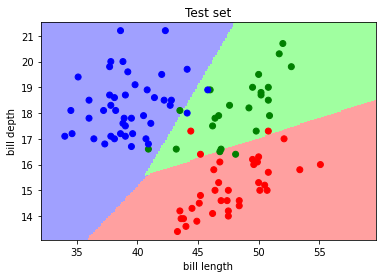

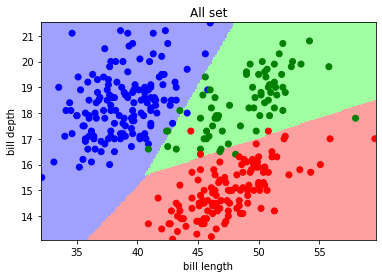

In [1]:
#SVM模型训练与预测
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split
#字符串标签转换为0，1，2
def species_label(s):
    it={b'Adelie':0, b'Chinstrap':1, b'Gentoo':2 }
    return it[s]

# 1.读取数据集
data = np.loadtxt('2.csv', dtype=float, delimiter=',',skiprows=1,usecols={2,3,0},converters={0:species_label})
# 2.划分数据与标签
X = data[:, 1:3]
y = data[:, 0]
#3.划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#模型训练
model = SVC(C=0.1, kernel='linear', degree=3, coef0=0.0)
model.fit(X_train, y_train)
#模型分类正确率评估
print("测试集预测正确率:",model.score(X_test,y_test))#输出测试集分类正确率
#绘图
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()  # 第0维特征的范围
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()  # 第1维特征的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网络采样点

x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
y_predict=model.predict(x_show)
y_predict=y_predict.reshape(x1.shape)

cmap_light = ListedColormap(['#A0A0FF','#A0FFA0', '#FFA0A0'])
cmap_dark = ListedColormap(['b', 'g', 'r'])

plt.pcolormesh(x1, x2, y_predict, cmap=cmap_light)#涂色
plt.xlabel('bill length')
plt.ylabel('bill depth')
plt.title("Test set")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cmap_dark)#测试样本点的显示
plt.show()
plt.pcolormesh(x1, x2, y_predict, cmap=cmap_light)#涂色
plt.xlabel('bill length')
plt.ylabel('bill depth')
plt.title("All set")
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_dark)#全体样本点的显示
plt.show()

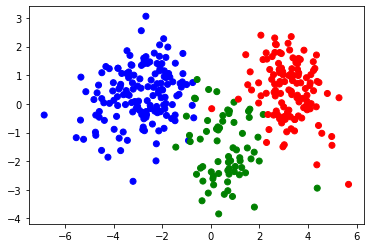

测试集预测正确率: 0.9223300970873787


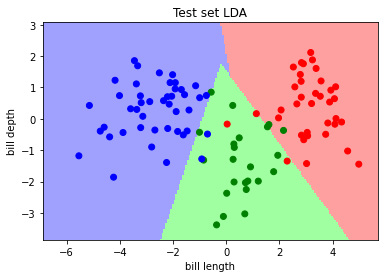

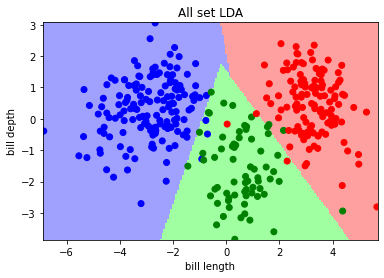

In [6]:
#使用LDA降维后的特征进行分类
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#字符串标签转换为0，1，2
def species_label(s):
    it={b'Adelie':0, b'Chinstrap':1, b'Gentoo':2 }
    return it[s]

# 1.读取数据集
data = np.loadtxt('2.csv', dtype=float, delimiter=',',skiprows=1,usecols={2,3,0},converters={0:species_label})
# 2.划分数据与标签
X1 = data[:, 1:3]
y = data[:, 0]
#3.LDA降维
lda = LDA(n_components=2)
lda.fit(X1,y)
X = lda.transform(X1)
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_dark)#降维后样本点的显示
plt.show()
##3.划分测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#模型训练
model = SVC(C=1.0, kernel='linear', degree=3, coef0=0.0)
model.fit(X_train, y_train)
#模型分类正确率评估
print("测试集预测正确率:",model.score(X_test,y_test))#输出测试集分类正确率
#绘图
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()  # 第0维特征的范围
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()  # 第1维特征的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网络采样点

x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
y_predict=model.predict(x_show)
y_predict=y_predict.reshape(x1.shape)

cmap_light = ListedColormap(['#A0A0FF','#A0FFA0', '#FFA0A0'])
cmap_dark = ListedColormap(['b', 'g', 'r'])

plt.pcolormesh(x1, x2, y_predict, cmap=cmap_light)#涂色
plt.xlabel('bill length')
plt.ylabel('bill depth')
plt.title("Test set LDA")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cmap_dark)#测试样本点的显示
plt.show()
plt.pcolormesh(x1, x2, y_predict, cmap=cmap_light)#涂色
plt.xlabel('bill length')
plt.ylabel('bill depth')
plt.title("All set LDA")
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_dark)#全体样本点的显示
plt.show()